In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/pbr/real/配当性向.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '売上高', '売上総利益率', '営業CF/売上比率',
       '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産', '現金及び預金', '売上債権',
       '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純有利子負債',
       '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

## SelectKBest(特徴量選択)

In [3]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '売上高', '売上総利益率', '営業CF/売上比率',
       '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産', '現金及び預金', '売上債権',
       '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純有利子負債',
       '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [4]:
sub_df = df.drop(columns=['銘柄コード', '会社名', '時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])

r_df = df.drop(columns=['時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])
sub_df.columns

Index(['PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率',
       '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産',
       '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [5]:
sub_df.isna().sum()

PER(会予)               0
PBR                   0
売上総利益率               16
営業CF/売上比率             1
営業利益率                12
ROE                   7
自己資本比率                0
有利子負債/総資産             0
有利子負債/時価総額            0
純有利子負債/時価総額           0
流動比率                  2
固定ネットキャッシュ            0
固定ネットキャッシュ比率          0
ネットキャッシュ              0
ネットキャッシュ比率            0
有形固定資産/総資産            0
固定負債/総資産              0
配当性向                  3
投資CF / 営業CF（3年平均）    10
セクター数                 0
dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#r_df = df[['PER(会予)', '営業CF/売上比率', '営業利益率', 'ROE',
#           '自己資本比率', '有利子負債/総資産', 'ネットキャッシュ比率',
#           '固定ネットキャッシュ比率', '有形固定資産/総資産',
#           '固定負債/総資産', 'PBR']]

sub_df.dropna(inplace=True)

X = sub_df.drop(columns=['PBR'])
y = sub_df['PBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[ True  True False  True  True False False False False False False  True
 False False False False False False False]


In [7]:
# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率

In [8]:
X.columns

Index(['PER(会予)', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

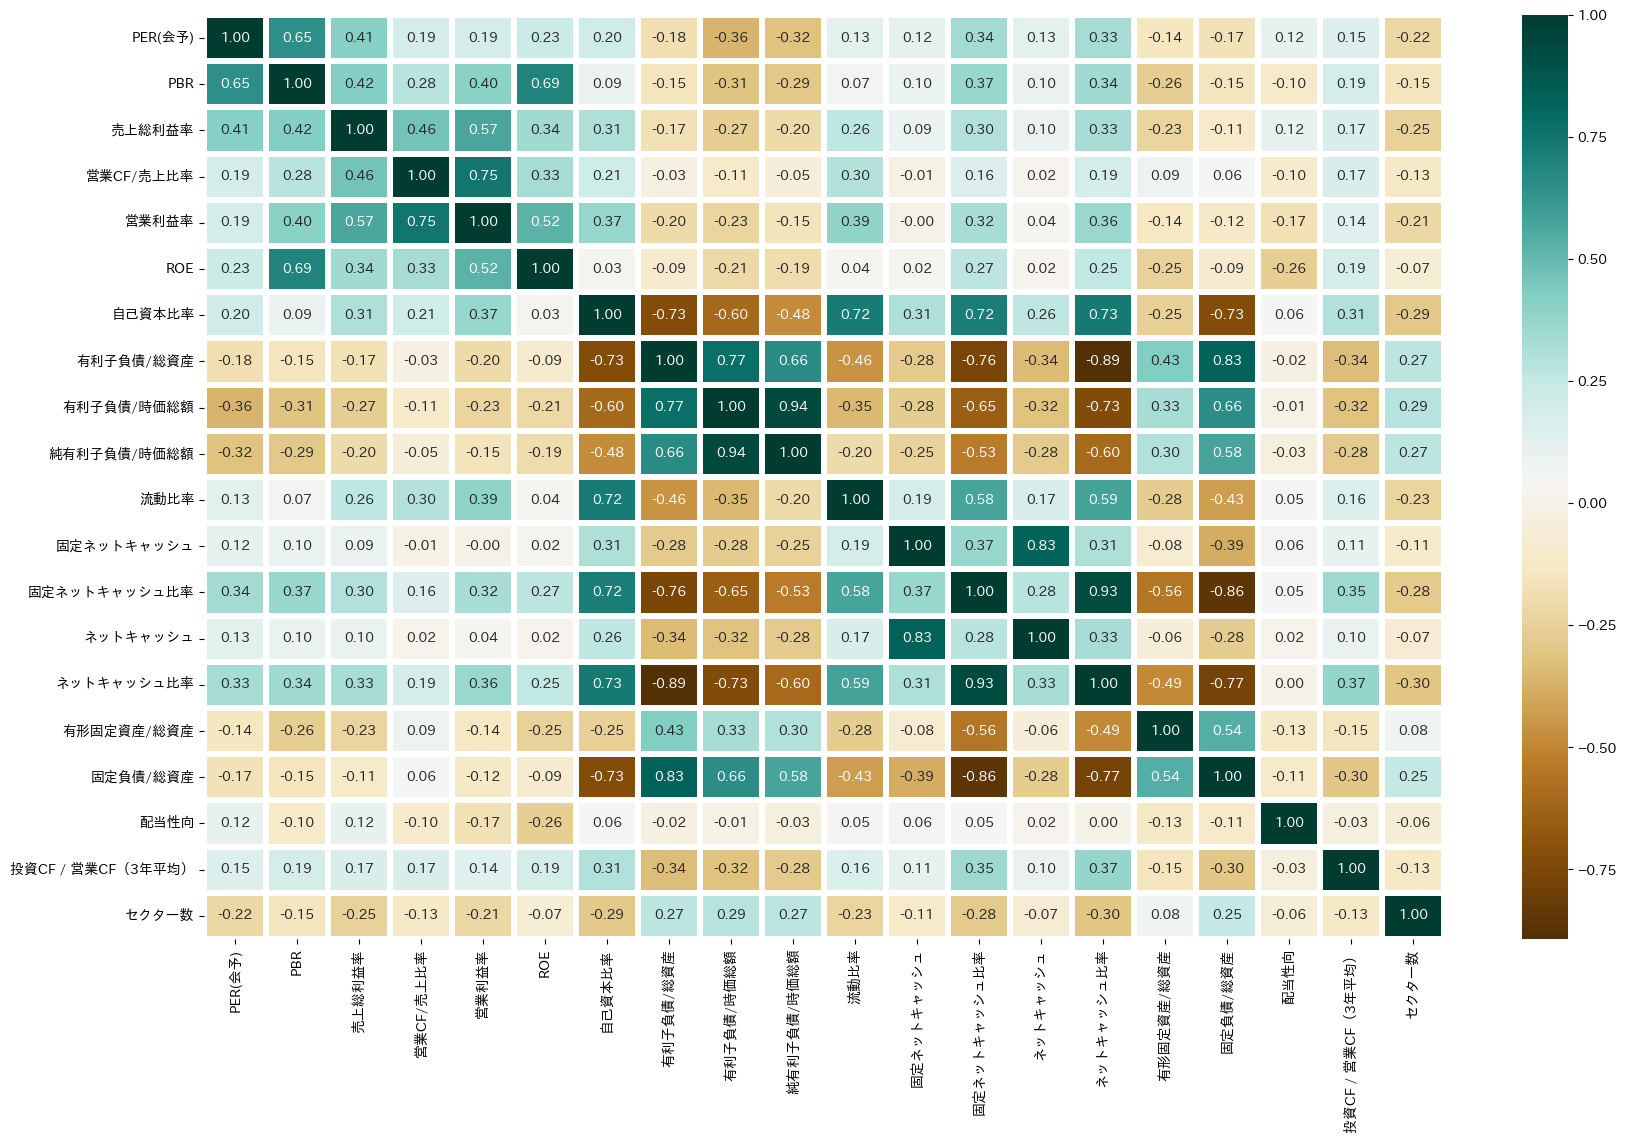

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = sub_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## 本番

In [10]:
sub_df.shape

(350, 20)

In [11]:
r_df.shape

(390, 22)

In [12]:
r_df.head()

,銘柄コード,会社名,PER(会予),PBR,売上総利益率,営業CF/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,...,流動比率,固定ネットキャッシュ,固定ネットキャッシュ比率,ネットキャッシュ,ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産,配当性向,投資CF / 営業CF（3年平均）,セクター数
0,2914,本たばこ産業,17.7,2.1,55.3,20.0,10.3,4.8,45.0,20.6,...,166.5,-1288831,-15.396873,-642221,-7.672220,10.843735,28.353530,192.20,0.00,4
1,6098,リクルートHD,30.4,6.8,57.5,15.7,11.8,19.7,61.8,6.9,...,203.5,532924,18.321158,671066,23.070280,1.995366,11.650480,8.80,-10.23,3
2,6501,立製作所,23.7,2.9,28.8,12.0,9.9,10.5,44.0,6.3,...,111.7,-479309,-3.607947,28944,0.217873,10.098275,10.128490,28.30,-18.58,4
3,6758,ソニーG,20.8,2.7,28.2,12.2,10.7,11.9,22.7,5.8,...,68.2,-13888594,-38.588489,403754,1.121802,4.242043,45.512195,10.60,-70.00,6
4,7011,三菱重工業,39.1,4.0,20.0,7.1,NaN,9.5,34.2,0.0,...,120.1,-476059,-6.975004,542003,7.941186,13.701400,14.916189,31.49,-38.65,4


In [13]:
r_df.columns

Index(['銘柄コード', '会社名', 'PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率',
       '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産',
       '固定負債/総資産', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [14]:

# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率
r_df = r_df[['銘柄コード', '会社名', 'PER(会予)','ROE',
             '固定ネットキャッシュ比率', 'PBR', '自己資本比率',
             '有形固定資産/総資産', 'ネットキャッシュ比率', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数']]

r_df.head()

,銘柄コード,会社名,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,配当性向,投資CF / 営業CF（3年平均）,セクター数
0,2914,本たばこ産業,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,192.20,0.00,4
1,6098,リクルートHD,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,8.80,-10.23,3
2,6501,立製作所,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,28.30,-18.58,4
3,6758,ソニーG,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,10.60,-70.00,6
4,7011,三菱重工業,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,31.49,-38.65,4


In [15]:
r_df.dropna(inplace=True)
company_names = r_df[['銘柄コード', '会社名']]

r_df = r_df.drop(columns=['銘柄コード', '会社名'])

r_df.shape

(375, 10)

In [16]:
r_df.columns

Index(['PER(会予)', 'ROE', '固定ネットキャッシュ比率', 'PBR', '自己資本比率', '有形固定資産/総資産',
       'ネットキャッシュ比率', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [17]:
company_names.shape

(375, 2)

In [18]:
X = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', '配当性向']]
# X = r_df.drop(columns=['PBR', '売上総利益率', '自己資本比率'])
y = r_df['PBR']

corr = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数' ,'PBR']]

In [19]:
X.shape

(375, 5)

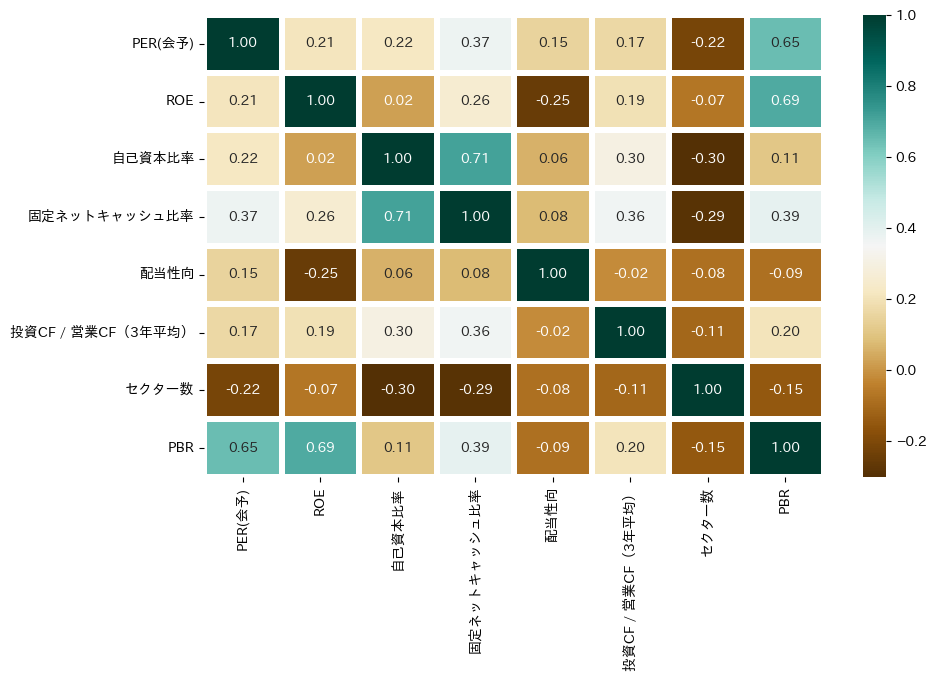

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = corr.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

### 交差検証

In [21]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.83155376 0.76907996 0.66559416 0.59006731 0.7687352 ]
平均決定係数 (R²): 0.7250060785549419
平均二乗誤差 (MSE) scores: [-0.98270966 -1.88729039 -0.81310498 -2.89230725 -0.70103042]
平均二乗誤差 (MSE): -1.4552885378902922
平均絶対誤差 (MAE) scores: [-0.64243349 -0.773751   -0.67471335 -0.7809892  -0.66061473]
平均絶対誤差 (MAE): -0.7065003510580691


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ridge回帰の交差検証付きモデル
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# パイプラインの作成
pipe_line = make_pipeline(StandardScaler(), ridge_cv_model)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {}'.format(-np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {}'.format(-np.mean(mae_scores)))

決定係数 (R²) scores: [0.83096151 0.76206354 0.67944163 0.58707943 0.78375007]
平均決定係数 (R²): 0.7286592340642766
平均二乗誤差 (MSE) scores: [-0.98616485 -1.94463505 -0.77943497 -2.91338844 -0.65551602]
平均二乗誤差 (MSE): 1.4558278653053975
平均絶対誤差 (MAE) scores: [-0.63662846 -0.77558237 -0.6576423  -0.76187392 -0.62975823]
平均絶対誤差 (MAE): 0.6922970539629326


In [23]:
X

,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,配当性向
0,17.7,4.8,45.0,-15.396873,192.20
1,30.4,19.7,61.8,18.321158,8.80
2,23.7,10.5,44.0,-3.607947,28.30
3,20.8,11.9,22.7,-38.588489,10.60
4,39.1,9.5,34.2,-6.975004,31.49
...,...,...,...,...,...
385,10.2,10.6,24.0,-3.482661,34.60
386,7.7,7.5,39.7,-19.636967,14.21
387,12.8,4.2,50.1,-22.423198,54.00
388,19.3,27.2,53.5,33.759335,120.00


### 予測モデル構築

In [24]:
company_names_col = company_names[['銘柄コード','会社名']]

company_names_col

,銘柄コード,会社名
0,2914,本たばこ産業
1,6098,リクルートHD
2,6501,立製作所
3,6758,ソニーG
4,7011,三菱重工業
...,...,...
385,7451,三菱食品
386,8242,エイチ･ツー･オーリテイリング
387,8273,イズミ
388,9744,メイテックGHD


In [25]:
from sklearn.linear_model import RidgeCV


sc = StandardScaler()
X_sc = sc.fit_transform(X)

lr = RidgeCV(alphas=(0.1, 1.0, 10.0))
lr.fit(X_sc, y)

lr_pred = lr.predict(X_sc)

r_df = r_df.copy()

r_df['予測PBR'] = lr_pred
r_df['予測誤差'] = r_df['PBR'] - lr_pred
r_df['PBRレシオ'] =  lr_pred / r_df['PBR']
r_df[['銘柄コード', '会社名']] = company_names_col


r_df.head(10)

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,配当性向,投資CF / 営業CF（3年平均）,セクター数,予測PBR,予測誤差,PBRレシオ,銘柄コード,会社名
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,192.20,0.00,4,0.640372,1.459628,0.304939,2914,本たばこ産業
1,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,8.80,-10.23,3,6.003538,0.796462,0.882873,6098,リクルートHD
2,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,28.30,-18.58,4,3.145935,-0.245935,1.084805,6501,立製作所
3,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,10.60,-70.00,6,2.865281,-0.165281,1.061215,6758,ソニーG
4,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,31.49,-38.65,4,5.180197,-1.180197,1.295049,7011,三菱重工業
5,8.1,13.8,-21.221911,1.0,37.9,16.271369,-33.054896,25.00,-99.26,3,1.483284,-0.483284,1.483284,7203,トヨタ自動車
6,11.1,15.3,-25.157451,1.7,38.0,14.744014,-44.903221,32.50,-40.37,7,2.118140,-0.418140,1.245965,8001,伊藤忠商事
7,17.1,29.6,12.315169,5.3,70.1,16.820609,15.850838,50.10,-23.32,1,5.834099,-0.534099,1.100773,8035,東京エレクトロン
8,15.0,10.1,-18.245809,1.1,43.6,13.365264,-32.942835,42.20,-13.36,6,1.606444,-0.506444,1.460404,8058,三菱商事
9,11.4,12.6,-28.661270,1.2,33.2,34.204582,0.278489,43.50,-81.55,4,1.622128,-0.422128,1.351773,9432,本電信電話


In [26]:
lr_pred.shape

(375,)

In [27]:
y.shape

(375,)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 評価指標の表示
print("決定係数 (R²):", r2_score(y, lr_pred))
print("平均二乗誤差 (MSE):", mean_squared_error(y, lr_pred))
print("平均絶対誤差 (MAE):", mean_absolute_error(y, lr_pred))

決定係数 (R²): 0.7521816213846811
平均二乗誤差 (MSE): 1.3514428155829952
平均絶対誤差 (MAE): 0.6823949305998068


In [29]:
print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 1.18402053  1.25351168 -0.3070689   0.37485545 -0.06540868]
切片: 2.1330666666666667


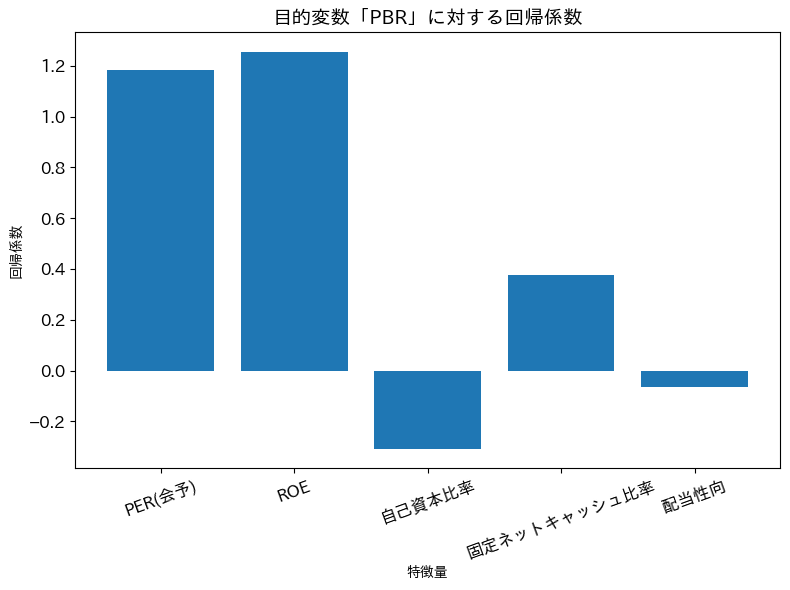

In [30]:
import matplotlib.pyplot as plt
import japanize_matplotlib

feature_names = X.columns
coefficients = lr.coef_

plt.figure(figsize=(8, 6))
bars = plt.bar(feature_names, coefficients)

plt.xlabel('特徴量')
plt.ylabel('回帰係数')
plt.title('目的変数「PBR」に対する回帰係数', fontsize=14)

# 特徴量のラベル（x軸のラベル）を大きく、角度も調整
plt.xticks(fontsize=12, rotation=20)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


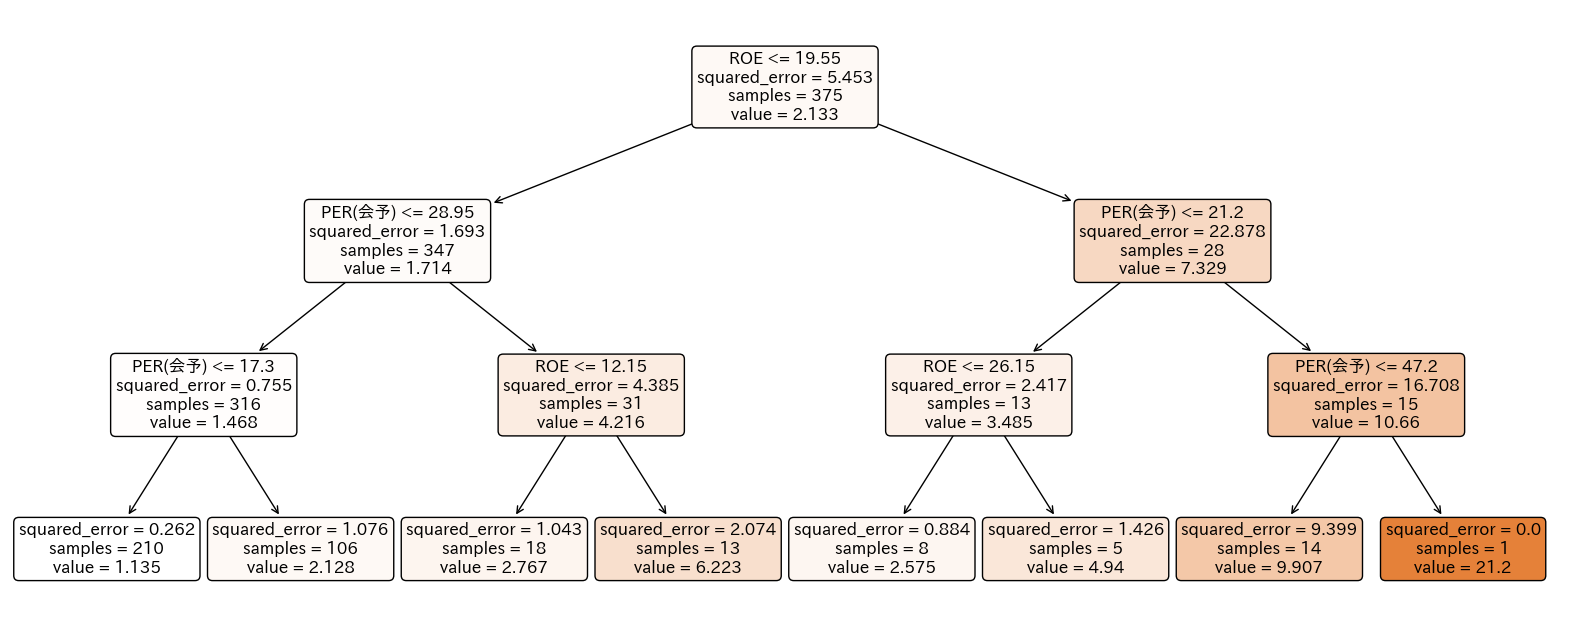

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(20, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

## 部分従属プロット

In [34]:
X

,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,配当性向
0,17.7,4.8,45.0,-15.396873,192.20
1,30.4,19.7,61.8,18.321158,8.80
2,23.7,10.5,44.0,-3.607947,28.30
3,20.8,11.9,22.7,-38.588489,10.60
4,39.1,9.5,34.2,-6.975004,31.49
...,...,...,...,...,...
385,10.2,10.6,24.0,-3.482661,34.60
386,7.7,7.5,39.7,-19.636967,14.21
387,12.8,4.2,50.1,-22.423198,54.00
388,19.3,27.2,53.5,33.759335,120.00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/Library/Framew

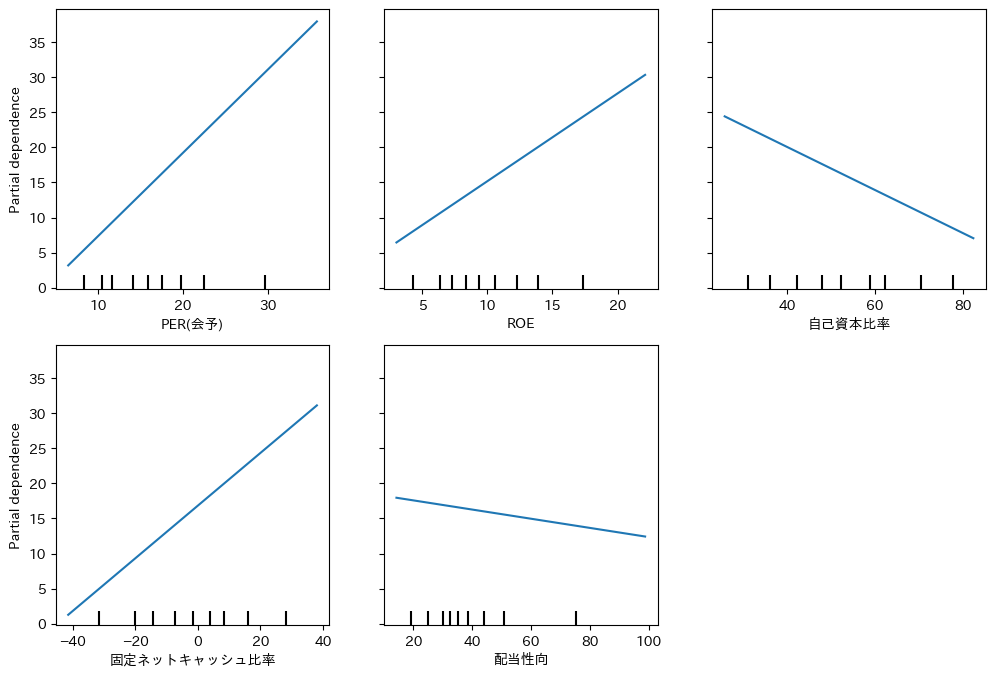

In [35]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,2,3,4]

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(lr, X,  features, feature_names=X.columns, ax=ax)
plt.show()


In [ ]:
lr_pred.shape

(375,)

In [ ]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', '岡村製作所', 'NexTone', 'グリーンズ']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [11.9, 14.8, 69.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 25.8, -7],       # AREHD
    [16.9, 13.9, 83.3, 14.23],      # 湖北工業
    [12.2, 19.03, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [8.3, 16.2, 58.7, 2.56],    # ナレルグループ
    [9.2, 11.9, 64, -7.74], # 岡村製作所
    [15.8, 25.22, 32.1, 61.25], # NexTone
    [6.7, 30, 29.4, -9.09], # グリーンズ
#    [12.04, 9.08, 19.6, ], # 三菱UFJ 
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but StandardScaler is expecting 5 features as input.

In [ ]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [18.2, 10.4, 55.4, 36.96], # 日水コン
     [17.8, 15.2, 76.8, 48.88], # インターメスティック
     [10.2, 7.1, 48.2, 10.72], # ワッツ
     [19.6, 2.3, 80.3, 43.73], # はてな
     [12.4, 15.3, 79.5, 19.38], # アイティーフォー
     [6.6, 6.9, 41.5, -35.82], # アサックス
     [6.7, 40, 36.6, -3.96], # グリーンズ
     [14.4, 15.5, 82, 63.36], # 福井コンピュータHD
     [8.5, 14.8, 45, 13.34], # CSS HD
     [13.7, 10.5, 71.1, 35.82], # ウィッツ
     [10.7, 8.4, 81.4, 51.37]
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 5.19778294,  2.77835193,  3.52627853,  0.71888975,  0.99296893,
        2.29570463, -0.43526972,  6.93465355,  3.26285025,  2.15743   ,
        1.89625719,  1.12610771])

In [ ]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [17, 11.8, 17.2, -37.14],  # NexTone(ROE抑えめ)
     [44.8, 2.3, 47.3, 31.78],
     [14.4, 4.3, 72.6, 19.15],
     [15.6, 13.88, 81.68, 24.47], # 湖北工業(24.12通期)
     [15.6, 15, 75, 20], # 湖北工業（改善後）
     [36, 39, 52.9, 36.29],
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 2.38413859,  4.81400319,  0.4346598 ,  2.48572023,  2.75871017,
       11.09082251])

In [ ]:
new_df = result_df[['会社名', '予測PBR']]

new_df

,会社名,予測PBR
0,明豊ファシリティワークス,1.990221
1,AREHD,1.435985
2,湖北工業,2.477601
3,アドバンテッジリスクマネジメント,3.294333
4,相鉄HD,1.133502
5,ナレルグループ,2.010529
6,岡村製作所,1.000293
7,NexTone,6.265122
8,グリーンズ,4.932411


In [ ]:
new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]

new_df

ValueError: Length of values (8) does not match length of index (9)

In [ ]:
new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']

df_sorted = new_df.sort_values(by='PBR-Ratio', ascending=False)

df_sorted

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_36622/3771652304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']


,会社名,予測PBR,実績PBR,PBR-Ratio
7,NexTone,6.225251,4.2,1.482203
1,AREHD,1.423122,1.0,1.423122
3,アドバンテッジリスクマネジメント,3.291224,2.4,1.371343
5,ナレルグループ,2.010272,1.5,1.340181
2,湖北工業,2.483351,2.3,1.079718
0,明豊ファシリティワークス,1.996519,1.9,1.050800
4,相鉄HD,1.145820,1.1,1.041654
6,岡村製作所,1.006586,1.1,0.915078


In [ ]:
new_df.describe()

,予測PBR,実績PBR,PBR-Ratio
count,8.000000,8.000000,8.000000
mean,2.447768,1.937500,1.213012
std,1.698700,1.064945,0.213829
min,1.006586,1.000000,0.915078
25%,1.353796,1.100000,1.048513
50%,2.003395,1.700000,1.209950
75%,2.685319,2.325000,1.384288
max,6.225251,4.200000,1.482203
